<a href="https://colab.research.google.com/github/qtannn/luxury_fashion_resale_analytics/blob/main/data_cleaning_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Business Objectives
1. Identify pricing strategy by **monitoring and predicting price trend**
2. Enhance sourcing strategy by **identifying which items hold value best**
3. Optimise inventory management by **identifying which items are sold fast/sold slow**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#Load the dataset
dataset = pd.read_csv("/content/drive/MyDrive/Portfolio/final_resale_price_tfg.csv")
dataset.tail(10)

,Brand,Product Name,Category,Original Price (AUD),Resale Price (AUD),Condition,Region,Season Sold,Days on Market,Date Listed
2229,Chanel,Boy Bag,Handbags,4467.0,1950.56,Like New,SYD,Spring,86,2024-03-05
2230,Dior,Saddle Bag,Handbags,7158.0,5256.09,Unknown,Perth,Spring,3,2024-09-16
2231,Fendi,Baguette Bag,Handbags,NaN,12094.80,New,Perth,Winter,136,2023-12-31
2232,Dior,Dior Caro,Handbags,19870.0,13685.07,Very Good,Melbourne,Spring,68,2024-01-26
2233,Balenciaga,Le Cagole,Handbags,10802.0,8874.34,Like New,SYD,Summer,154,2023-07-26
2234,Gucci,Ophidia Tote,Handbags,17760.0,9366.82,Like New,unknown,Winter,17,2024-12-22
2235,Balenciaga,Hourglass Bag,Handbags,8402.0,6687.46,Unknown,Brisbane,Autumn,157,2023-03-05
2236,Prada,Double Tote,Handbags,17587.0,11418.49,New,SYD,Summer,136,2024-10-31
2237,Dior,Saddle Bag,Handbags,NaN,4037.55,New,SYD,Winter,61,2023-07-19
2238,Fendi,Peekaboo,Handbags,10907.0,8746.51,Like New,Brisbane,Summer,70,2024-10-24


In [ ]:
dataset.info()
#There are misisng values in Original Price and Condition
#Date Listed is in wrong data type - datetime instead of object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2239 entries, 0 to 2238
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Brand                 2239 non-null   object 
 1   Product Name          2239 non-null   object 
 2   Category              2239 non-null   object 
 3   Original Price (AUD)  2187 non-null   float64
 4   Resale Price (AUD)    2239 non-null   float64
 5   Condition             2187 non-null   object 
 6   Region                2239 non-null   object 
 7   Season Sold           2239 non-null   object 
 8   Days on Market        2239 non-null   int64  
 9   Date Listed           2239 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 175.1+ KB


#Data Cleaning and Preprocessing

##Categorical Variables

In [ ]:
#Brand Name
print("All brand name:",dataset["Brand"].unique())
print("\nAll brand name is correctly formatted with no string errors")

All brand name: ['Balenciaga' 'Gucci' 'Hermès' 'Chanel' 'Dior' 'Prada' 'Rolex' 'Cartier'
 'Fendi' 'Louis Vuitton']

All brand name is correctly formatted with no string errors


In [ ]:
#Product
dataset["Product Name"].unique()
count_products=dataset["Product Name"].value_counts()
count_products.sort_values(ascending = False).head(10)

,count
Product Name,
Dionysus,77
Re-Edition 2005,70
Galleria,69
Boy Bag,68
Saddle Bag,66
Tank Watch,66
Trinity Ring,66
Peekaboo,63
Baguette Bag,62


In [ ]:
#Category
dataset["Category"].unique()
print("The dataset contains 3 categories:", dataset["Category"].unique())
dataset["Category"].value_counts()

The dataset contains 3 categories: ['Handbags' 'Watches' 'Jewelry']


,count
Category,
Handbags,1784
Jewelry,237
Watches,218


In [ ]:
#Condition
dataset.head(5)
##Check for unique value
dataset["Condition"].unique() #No standardised categories on Condition
#Standardise the "Condition" categories to ensure consistency
"""
The pre-owned market has a popular category on Condition as follows:
Excellent > Very Good > Good > Fair > Poor
Look up the unique values of the Condition to check for inconsistencies:
Any other categories out of this scale would be transformed to align with the standardised scale
"""
##New to Excellent
dataset["Condition"] = dataset["Condition"].replace(["Excell", "New"],"Excellent")
##Like New to Very Good
dataset["Condition"] = dataset["Condition"].replace("Like New","Very Good")
##poor to Poor
dataset["Condition"] = dataset["Condition"].replace("poor","Poor")

#Handle missing value
dataset["Condition"].unique()
##Condition has both NaN value and "Unknown" --> gonna transform them all to NaN first
dataset.loc[dataset["Condition"].str.contains("Unknown", na=False), "Condition"] = np.nan
##Calculate the % of missing values out of entire values
missing_values = (dataset["Condition"].isna().sum() / len(dataset))*100
print("% of missing values:", missing_values) #14% is a high percentage, impute may introduce bias/impact data integrity
##Since I want to maintain the data integrity, I just replace NaN values with "Unknown"
dataset["Condition"] = dataset["Condition"].fillna("Unknown")

#Final check: ensuring no missing values at all
dataset.isna().sum()
dataset.head(5)

,Brand,Product Name,Category,Original Price (AUD),Resale Price (AUD),Condition,Region,Season Sold,Days on Market,Date Listed
0,Balenciaga,Hourglass Bag,Handbags,8398.0,3389.94,Poor,Brisbane,Spring,16,2023-11-08
1,Gucci,Jackie 1961,Handbags,6424.0,3342.09,Good,Adelaide,Autumn,11,2024-04-23
2,Hermès,Constance,Handbags,10431.0,4371.58,Unknown,Adelaide,Spring,97,2024-11-16
3,Balenciaga,City Bag,Handbags,17624.0,9983.06,Fair,SYD,Spring,159,2024-07-22
4,Hermès,Birkin 25,Handbags,17490.0,11317.80,Fair,Melbourne,Autumn,135,2024-01-28


In [ ]:
#Region
dataset["Region"].unique()
print(dataset["Region"].unique())
#Data inconsistencies in Region as one location is written in different way
#Standardize it to the region's full name
dataset["Region"]=dataset["Region"].replace(["SYD","Melb", "unknown"], ["Sydney","Melbourne", "Unknown"])


['Brisbane' 'Adelaide' 'SYD' 'Melbourne' 'unknown' 'Sydney' 'Perth' 'Melb']


In [ ]:
#Season Sold
dataset["Season Sold"].unique()
#No standardization needed as they are in corrected format and strings

array(['Spring', 'Autumn', 'Winter', 'Summer'], dtype=object)

In [ ]:
#Date Listed
#Convert to datetime data type
dataset["Date Listed"] = pd.to_datetime(dataset["Date Listed"])
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2239 entries, 0 to 2238
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Brand                 2239 non-null   object        
 1   Product Name          2239 non-null   object        
 2   Category              2239 non-null   object        
 3   Original Price (AUD)  2187 non-null   float64       
 4   Resale Price (AUD)    2239 non-null   float64       
 5   Condition             2239 non-null   object        
 6   Region                2239 non-null   object        
 7   Season Sold           2239 non-null   object        
 8   Days on Market        2239 non-null   int64         
 9   Date Listed           2239 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 175.1+ KB


##Numerical Variables

In [ ]:
#Days on Market
#No missing values
dataset["Days on Market"].isna().sum()

0

In [ ]:
print(dataset.head(5))

        Brand   Product Name  Category  Original Price (AUD)  \
0  Balenciaga  Hourglass Bag  Handbags                8398.0   
1       Gucci    Jackie 1961  Handbags                6424.0   
2      Hermès      Constance  Handbags               10431.0   
3  Balenciaga       City Bag  Handbags               17624.0   
4      Hermès      Birkin 25  Handbags               17490.0   

   Resale Price (AUD) Condition     Region Season Sold  Days on Market  \
0             3389.94      poor   Brisbane      Spring              16   
1             3342.09      Good   Adelaide      Autumn              11   
2             4371.58   Unknown   Adelaide      Spring              97   
3             9983.06      Fair     Sydney      Spring             159   
4            11317.80      Fair  Melbourne      Autumn             135   

  Date Listed  
0  2023-11-08  
1  2024-04-23  
2  2024-11-16  
3  2024-07-22  
4  2024-01-28  


In [ ]:
#Original Price
##Check for missing values
dataset["Original Price (AUD)"].isna().sum() #52 missing values
dataset.loc[dataset["Original Price (AUD)"].isna()].head(5)
##Check which product has missing original price
dataset_allNA = dataset.loc[dataset["Original Price (AUD)"].isna()]
dataset_allNA["Product Name"].nunique() #52 missing values across 27 product name
"""
Usually, we're gonna handle the missing price with the existing prices.
However, within this dataset we're facing a roadblock of same product but different price
Therefore, we need to examine the price variation and handle this inconsistency first before handling missing values
"""
##Check for price variation
"""The process here is as followed:
- Calculate the price variation: price_Var = max price - min price
- Check if the price variation greater than 200 AUD:
    - If yes, further investigate: price spike, data entry errors, etc
    - If no, it's not a big deal, proceed forwards
- Calculate the mean price of each item and impute the whole group with that fixed original price
"""
dataset.groupby(dataset["Product Name"])["Original Price (AUD)"].describe()
price_variation = dataset.groupby(dataset["Product Name"])["Original Price (AUD)"].describe()
price_variation = price_variation.loc[:,["min", "max", "mean"]]
price_variation["variation"] = price_variation["max"]-price_variation["min"]
price_variation = price_variation.reset_index()

##Check if any product has more than 200 AUD price difference
if price_variation["variation"].any() > 200:
    print("More than 200 AUD different for:", price_variation["Product Name"].loc[price_variation["variation"] > 200])
else:
    print("The price difference is not significant")

##The price gap is not significant with all the prices ranging below the 200 AUD gap. However, since the original price is not consistent, I'm gonna impute all of them with the mean value to ensure consistency for later analysis
price_variation["mean"] = round(price_variation["mean"])

##Impute the mean price to each product
product_mean = price_variation[["Product Name","mean"]]
product_mean = product_mean.set_index("Product Name")

product_price = product_mean.to_dict()
product_price = product_price["mean"] #This needs a dict to pass in the .map() function {"Alma BB": 5212}

dataset["Original Price (AUD)"] = dataset["Product Name"].map(product_price)

##Check for price consistency
dataset.groupby(dataset["Product Name"])["Original Price (AUD)"].describe()

The price difference is not significant


,count,mean,std,min,25%,50%,75%,max
Product Name,,,,,,,,
Alma BB,52.0,5212.0,0.0,5212.0,5212.0,5212.0,5212.0,5212.0
Baguette Bag,62.0,16671.0,0.0,16671.0,16671.0,16671.0,16671.0,16671.0
Birkin 25,53.0,17479.0,0.0,17479.0,17479.0,17479.0,17479.0,17479.0
Book Tote,61.0,11497.0,0.0,11497.0,11497.0,11497.0,11497.0,11497.0
Boy Bag,68.0,4436.0,0.0,4436.0,4436.0,4436.0,4436.0,4436.0
Capucines,52.0,12981.0,0.0,12981.0,12981.0,12981.0,12981.0,12981.0
City Bag,53.0,17610.0,0.0,17610.0,17610.0,17610.0,17610.0,17610.0
Classic Flap Bag,58.0,5006.0,0.0,5006.0,5006.0,5006.0,5006.0,5006.0
Cleo Shoulder Bag,58.0,16598.0,0.0,16598.0,16598.0,16598.0,16598.0,16598.0


In [ ]:
#Check Resale Price data distribution
plt.figure()
sns.boxplot(dataset, y = "Resale Price (AUD)")

# All product with Resale Price > Retail Price
resaleprice = dataset.loc[dataset["Resale Price (AUD)"] > dataset["Original Price (AUD)"]]

In [ ]:
#Visiualisation: items having more than 100% retention value
resaleprice.loc[resaleprice["Condition"] == "Poor"]
##Some items are in poor condition but sold at a very high price.
##From the manager's sharing, TFG was playing price manipulation for some items, evidenced in their long days on market.

,Brand,Product Name,Category,Original Price (AUD),Resale Price (AUD),Condition,Region,Season Sold,Days on Market,Date Listed,Value Retention
33,Dior,Book Tote,Handbags,11497.0,17186.33,Poor,Brisbane,Spring,110,2024-08-22,149.49
235,Prada,Galleria,Handbags,13165.0,16324.48,Poor,Brisbane,Summer,165,2023-08-31,124.00
349,Louis Vuitton,Speedy 30,Handbags,3829.0,4842.10,Poor,Sydney,Winter,107,2023-06-19,126.46
1370,Fendi,Peekaboo,Handbags,10980.0,12307.88,Poor,Melbourne,Winter,144,2023-02-18,112.09
1445,Rolex,Datejust,Watches,11758.0,14337.29,Poor,Unknown,Autumn,81,2023-06-23,121.94
1473,Dior,Dior Caro,Handbags,19849.0,27680.01,Poor,Brisbane,Spring,35,2024-05-12,139.45
1919,Gucci,Dionysus,Handbags,7561.0,9747.71,Poor,Melbourne,Spring,149,2024-06-11,128.92
2200,Louis Vuitton,Neverfull Tote,Handbags,6189.0,9129.02,Poor,Melbourne,Autumn,1,2024-01-31,147.50


In [ ]:
#However, there are some items with legitmate high value retention: Rolex Daytona, Hermes Kelly 28, Cartier Tank Watch, and Cartier Panthere Watch due to their classic designs.
dataset.groupby(["Brand","Product Name"])["Value Retention"].mean().sort_values(ascending = False)

Brand          Product Name     
Rolex          Daytona              72.898364
Hermès         Kelly 28             72.717368
Cartier        Tank Watch           72.096667
               Panthère Watch       71.754259
Fendi          Peekaboo             71.443651
Dior           Book Tote            70.531967
Rolex          Submariner           70.489091
Cartier        Love Bracelet        70.338431
Prada          Cleo Shoulder Bag    70.267241
Louis Vuitton  Capucines            70.192692
Gucci          Jackie 1961          70.175814
Balenciaga     City Bag             69.980943
Dior           Dior Caro            69.407447
Balenciaga     Hourglass Bag        69.206481
               Le Cagole            69.179778
Rolex          Datejust             68.950851
Gucci          Marmont Mini         68.745625
Chanel         Gabrielle Hobo       68.722931
Louis Vuitton  Speedy 30            68.628333
Prada          Double Tote          68.408400
Gucci          Dionysus             68.262987
Prada          Re-Edition 2005      68.176571
Gucci          Ophidia Tote         68.169508
Dior           Lady Dior            68.164615
Chanel         Coco Handle          68.058305
Hermès         Birkin 25            67.641132
Fendi          Baguette Bag         67.496129
Hermès         Constance            67.438980
               Evelyne III          67.293774
Dior           Saddle Bag           67.045758
Balenciaga     Neo Classic          66.872000
Fendi          Mon Tresor           66.784200
Chanel         Boy Bag              66.619559
Louis Vuitton  Alma BB              66.376731
Prada          Galleria             66.344058
Fendi          Sunshine Shopper     66.136923
Louis Vuitton  Neverfull Tote       64.747222
Chanel         Classic Flap Bag     64.102069
Cartier        Trinity Ring         64.062727
Rolex          Explorer             63.193607
Name: Value Retention, dtype: float64

##Handling outliers

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

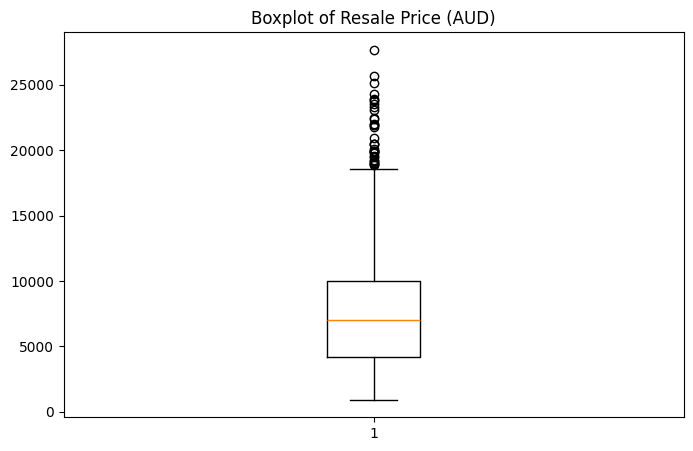

In [ ]:
#Resale Price
##Check for outliers
plt.figure(figsize=(8, 5))
plt.boxplot(x=dataset["Resale Price (AUD)"])
plt.title("Boxplot of Resale Price (AUD)")
plt.show()

There are outliers in Resale Price (AUD).
However, these outliers are items with scarity/high demand with legitimate value.

#Exploratory Data Analysis


- Which luxury brands have the highest resale value?

- Which items retain value the best?

- Which items are most depreciated?

- Which brands retain value best?

- Which categories retain value best?

- Distribution of Value Retention?

- Which items are most sought-after?

- Which category is most sought-after?





<ipython-input-116-ffeaf0d14198>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = brand_resale, x = "Brand", y = "Resale Price (AUD)", palette="Blues_r")


Text(0.5, 1.0, 'Luxury Brands by Resale Value')

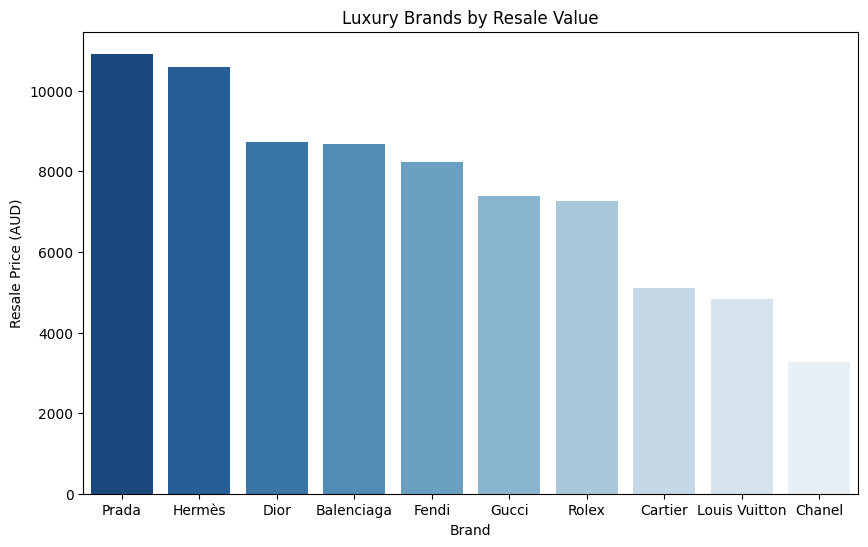

In [ ]:
#Which luxury brands have the highest resale value?
dataset.head(5)
brand_resale = dataset.groupby(dataset["Brand"])["Resale Price (AUD)"].mean()
brand_resale = brand_resale.sort_values(ascending = False)
brand_resale = brand_resale.reset_index()

#Visualisation
plt.figure(figsize=(10,6))
sns.barplot(data = brand_resale, x = "Brand", y = "Resale Price (AUD)", palette="Blues_r")
plt.title("Luxury Brands by Resale Value")

- Prada has the highest average resale value, followed by Hermès. This could be attributed to classic designs or strong demand at that time.

- Conversely, Chanel ranks the lowest, suggesting lowest demand for Chanel items in this dataset. This could be due to oversupply in the pre-owned market, seasonal trends, or frequent model changes reducing long-term value retention.


<ipython-input-112-432dce21160d>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  item_retention_top10["Brand - Product"] = item_retention_top10["Brand"] + " - " + item_retention_top10["Product Name"]
<ipython-input-112-432dce21160d>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = item_retention_top10, x="Value Retention", y="Brand - Product", palette = "Blues_r")


Text(0.5, 1.0, 'Top 10 items holding value best')

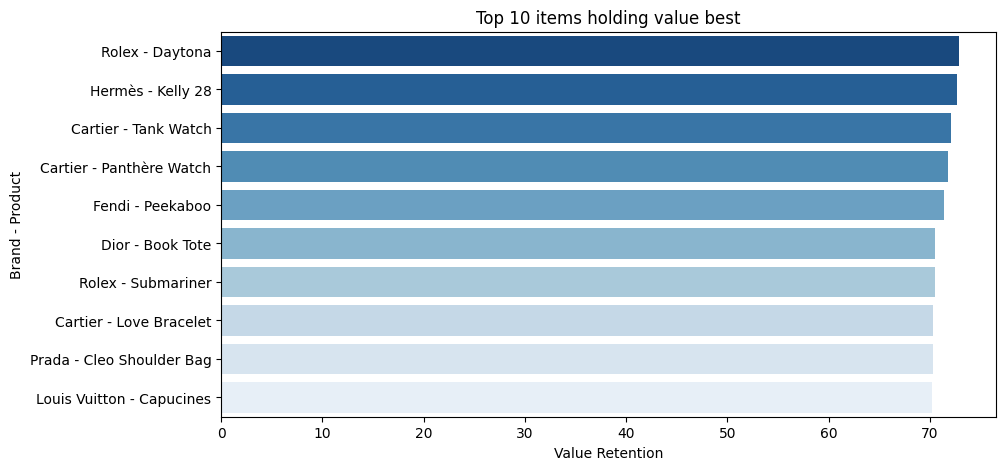

In [ ]:
#Which items retain value best?
"""
Here I will quantify value retention as calculated below:
Value Retention = (Resale Price/Original Price)*100
High value retention means retaining value best
"""
##Calculate the metric
dataset["Value Retention"] = round((dataset["Resale Price (AUD)"]/dataset["Original Price (AUD)"])*100,2)

##New dataframe: items by retention rate

item_retention = dataset.groupby([dataset["Brand"],dataset["Product Name"]])["Value Retention"].mean()
item_retention = item_retention.sort_values(ascending = False).reset_index()
item_retention["Value Retention"] = round(item_retention["Value Retention"],2)

#Top 10 item with highest price retention
item_retention_top10 = item_retention.head(10)
item_retention_top10["Brand - Product"] = item_retention_top10["Brand"] + " - " + item_retention_top10["Product Name"]
#Visualisation
plt.figure(figsize=(10,5))
sns.barplot(data = item_retention_top10, x="Value Retention", y="Brand - Product", palette = "Blues_r")
plt.title("Top 10 items holding value best")

- Luxury timepieces dominate the resale market, with Rolex and Cartier models retaining the highest value. This is likely due to their exclusivity, strong brand reputation, and the fact that they are often difficult to purchase at in-store, making the pre-owned market an attractive choice.

- Timepieces being the most price-retained items also proves that  luxury watches are among the best resale investments. Unlike fashion items that depreciate with changing trends, high-end watches have a strong collector's market, ensuring long-term value retention

- Hermès Kelly 28 is the only ultra-premium bag on the list. Unlike other handbags that rely on seasonal hype, Hermès Kelly bags are known for their rarity and exclusivity, making them one of the few bags that consistently appreciate or retain value over time.

- Other handbags in the list, such as Prada Cleo, Gucci Dionysus, Lady Dior, and Fendi Peekaboo, are highly value-retained items. This is probably due to their timeless and classic designs for long-term use.

<ipython-input-118-2087c2659cea>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Value Retention", y="Brand & Product", data=item_retention_bot10, palette="Reds_r")


(0.0, 73.55700000000002)

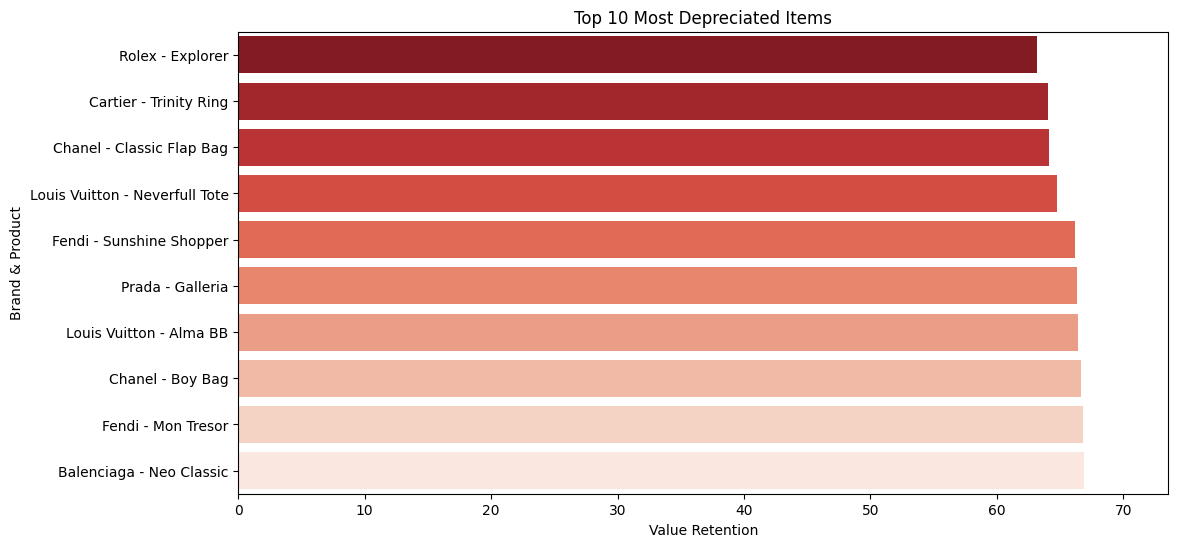

In [ ]:
#Top 10 items with the most depreciated price?
"""
Most depreciated items = lowest price retention
"""
## DataFrame for top 10 most depreciated price
item_retention_bot10 = item_retention.tail(10)
item_retention_bot10 = item_retention_bot10.sort_values(by="Value Retention").reset_index()
item_retention_bot10 = item_retention_bot10[["Brand", "Product Name", "Value Retention"]]
item_retention_bot10["Brand & Product"] = item_retention_bot10["Brand"] + " - " + item_retention_bot10["Product Name"]

#Visualisation
##Combine the Brand & Product columns into one
plt.figure(figsize=(12, 6))
sns.barplot(x="Value Retention", y="Brand & Product", data=item_retention_bot10, palette="Reds_r")
plt.title("Top 10 Most Depreciated Items")
plt.xlim(0, item_retention_bot10["Value Retention"].max() * 1.1)

- Louis Vuitton Neverfull Tote and Chanel Classic Flap Bag have the highest depreciation:

    - The Louis Vuitton Neverfull Tote is the most depreciated item, despite being one of LV’s best-selling handbags.
    - The Chanel Classic Flap Bag follows closely, suggesting that high retail pricing does not guarantee high resale value.

- Possible Reasons:
    - Market oversaturation—these models are mass-produced and widely available.
    - Price hikes in retail make them too expensive, discouraging buyers in resale markets.
    - Frequent new releases reduce demand for older models.

- Luxury jewelry & watches also appear in the most depreciated list:
    - Cartier Trinity Ring & Rolex Explorer are unexpected entries in the most depreciated list.
    - Rolex watches are generally strong investments, so seeing Explorer here suggests it may not hold value as well as other Rolex models (e.g., Daytona, Submariner).
    - Cartier Trinity Ring—jewelry often has lower resale retention unless it's ultra-premium, rare, or limited edition.

<ipython-input-119-aed4100fba9d>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = brand_loss, x = "Brand", y = "Value Retention", palette = "Blues_r")


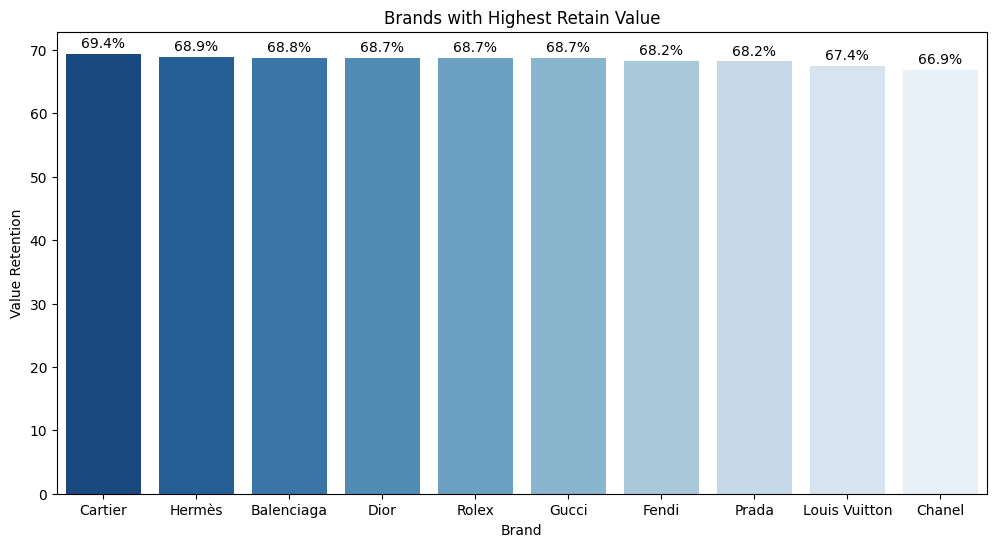

In [ ]:
#Which brands retain value best?
##Highest price retention = lowest loss percentage
dataset.head(5)
brand_loss = round(dataset.groupby(dataset["Brand"])["Value Retention"].mean(),2)
brand_loss = brand_loss.sort_values(ascending = False).reset_index()
brand_loss

#Visualisation
plt.figure(figsize = (12,6))
sns.barplot(data = brand_loss, x = "Brand", y = "Value Retention", palette = "Blues_r")
plt.title("Brands with Highest Retain Value")

for index, value in enumerate(brand_loss["Value Retention"]):
    plt.text(index, value + 1, f"{value:.1f}%", ha='center', fontsize=10)

- Cariter, Hermes, and Balenciaga have the highest resale retention (~68%)
    - The former 2 have classic, timeless, and investment-worthy pieces that hold value due to scarcity, craftmanship, and demand stability.
    - Balenciaga has temporary hype due to its new collection, supported by celebrities wearing them
    - **Implication for TFG**
        - Prioritize sourcing Cartier jewelry, Rolex watches, and Hermès handbags as they offer long-term value stability.
- Chanel and Louis Vuitton have the lowest retention (~64-65%)
    - Despite their strong brand presence, frequent retail price hikes, mass production, and seasonal trends lead to lower resale value.
    - **Implication for TFG**
        - Selective in sourcing Chanel and Louis Vuitton, focusing on items with stable demand and stable value retention
        - Competitive pricing to ensure fast inventory turnover
- Gucci, Dior, and Prada hold competitive value (~66-67%)
    - These brands retain moderate value
    - **Implication for TFG**
        - Consider selling Gucci, Dior, and Prada items with classic designs, strong demand, and stable value retention.

<ipython-input-130-e4bb52f9e9e5>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = cat_retention, x = "Category", y = "Value Retention", palette="Blues")


Text(0.5, 1.0, 'Categories by Value Retention')

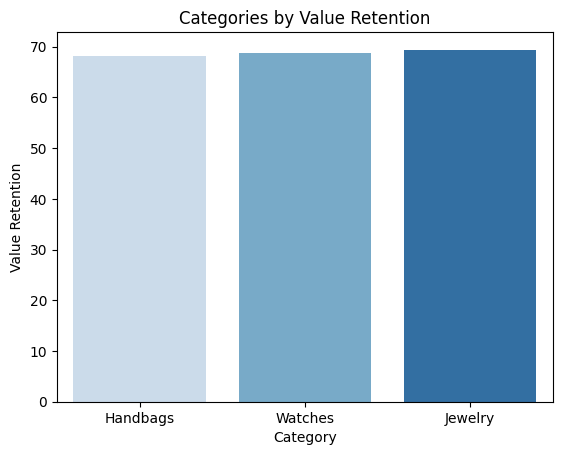

In [ ]:
#Which categories retain value best? (e.g., handbags vs. watches vs. sneakers)
#New dataframe: cat_retention
cat_retention = round(dataset.groupby("Category")["Value Retention"].mean(),2)
cat_retention = cat_retention.sort_values()
cat_retention = cat_retention.reset_index()

#Visualisation
plt.figure()
sns.barplot(data = cat_retention, x = "Category", y = "Value Retention", palette="Blues")
plt.title("Categories by Value Retention")

In spite of subtle difference, jewelries and watches have higher retention than handbags. This informs TFG with its sourcing and pricing strategies.

1. Luxury watches and jewelries are better investment pieces.
    - Since they have higher retention value, they hold long-term resale value better than handbags.
    - **Implication for TFG:**
        - Prioritise sourcing watches (those with higher retention values) and premium jewelry
        - Advertise watches and jewelry as "investment pieces" and emphasise on its long-term value to attract buyers
2. Handbags lose value more quickly, likely due to trends and seasonal demand.
    - **Implication for TFG:**
        - Offer competitive pricing on handbags to ensure quick turnover
        - Focus on rare and ultra-premium handbags (Hermes Kelly 28) rathr than mass-market bags which easily get left behind the trends.


count    2239.000000
mean       68.390531
std        19.940203
min        39.950000
25%        54.055000
50%        66.350000
75%        79.220000
max       150.780000
Name: Value Retention, dtype: float64


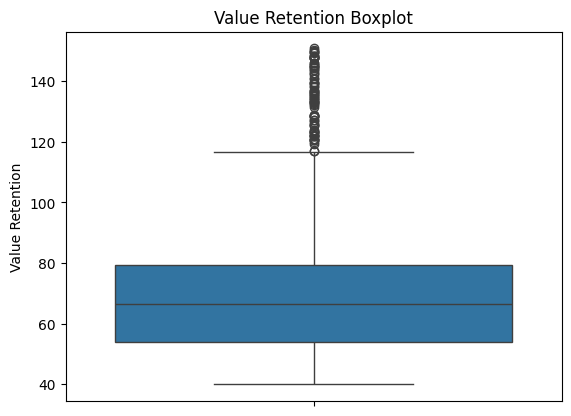

In [ ]:
#Box plot for Value Retention
plt.figure()
sns.boxplot(data = dataset, y = "Value Retention")
plt.title("Value Retention Boxplot")
print(dataset["Value Retention"].describe())

- Majority of items have value retention at 54-77% with exceptions having more than 100%. The 54-77% range means that most items have lost 23-46% of their original retail value.

- The IQR is relatively compact, meaning most items lying within this range.

- **Implication for TFG:**
    - For legitimate high valued items (Hermes Kelly 28, Rolex Daytona, etc), keep pricing  aggressively and market them as "investment pieces" to maximize profitability.
    - For standard market pieces, TFG can use this 54-77% range as an initial benchmark/reference point for setting the price.
    - Items below the 54% range might struggle to resell → Use flash sales or promotional bundles to move inventory.





<Axes: xlabel='Value Retention', ylabel='Count'>

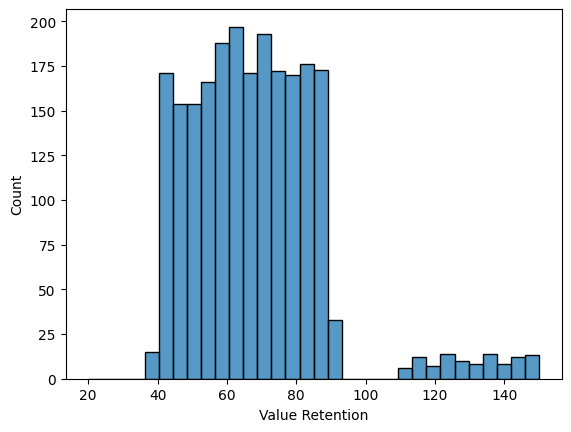

In [ ]:
sns.histplot(data = dataset, x = "Value Retention", binwidth = 4, binrange = (20,150))

,Days on Market
count,2239.000000
mean,90.669495
std,51.781029
min,1.000000
25%,47.000000
50%,93.000000
75%,135.000000
max,180.000000


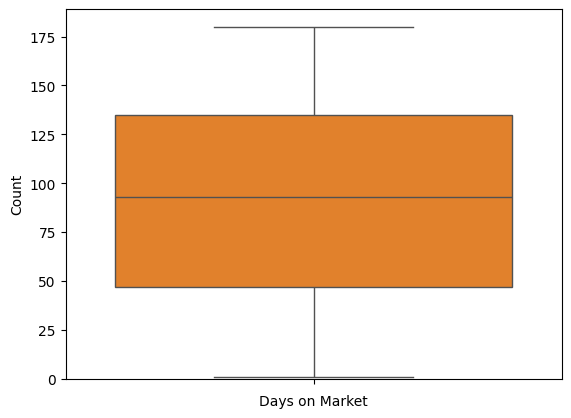

In [ ]:
sns.histplot(data = dataset, x = "Days on Market", binwidth = 10)
sns.boxplot(data = dataset, y = "Days on Market")
dataset["Days on Market"].describe()

Text(0.5, 1.0, 'Top 10 most sought-after items')

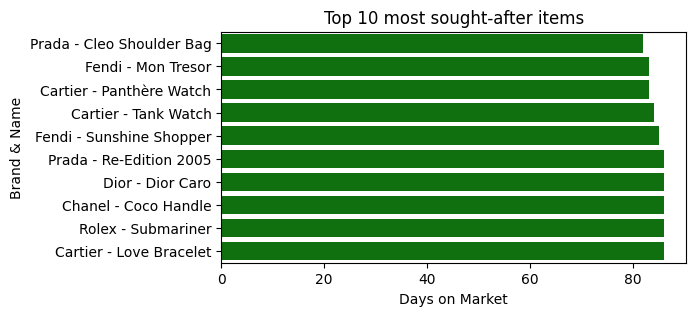

In [ ]:
#Top 10 most sought-after items (selling fast)
##Most sought after items = Items with lowest average days in market
sought_after = dataset.groupby([dataset["Brand"],dataset["Product Name"]])["Days on Market"].mean()
sought_after = sought_after.reset_index()
sought_after["Days on Market"] = round(sought_after["Days on Market"],0)
sought_after_10 = sought_after.sort_values(by = "Days on Market").head(10)
sought_after_10["Brand & Name"] = sought_after_10["Brand"] + " - " + sought_after_10["Product Name"]

##Visualisation
plt.figure(figsize = (6,3))
sns.barplot(data = sought_after_10, x = "Days on Market", y = "Brand & Name", color = "green")
plt.title("Top 10 most sought-after items")

Luxury handbags dominate the fastest-selling items. Prada Cleo Shoulder Bag, Fendi Mon Tresor, Dior Caro, and Chanel Coco Handle appear on the list, suggesting that handbags in the luxury resale market tend to sell faster than other categories. This indicates strong demand for designer handbags, likely due to versatility, brand recognition, and investment potential.

At the same time, some items in timepieces category also have quick turnaround. Cartier Panthère Watch, Cartier Tank Watch, and Rolex Submariner are among the fastest-selling items. This suggests that certain high-demand timepieces still retain strong resale demand, possibly due to brand prestige, timeless appeal, and limited availability in retail stores.


<ipython-input-134-553f3800daa8>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = brand_days, x = "Brand", y = "Days on Market", palette = "Blues")


Text(0.5, 1.0, 'Days on Market by Brands')

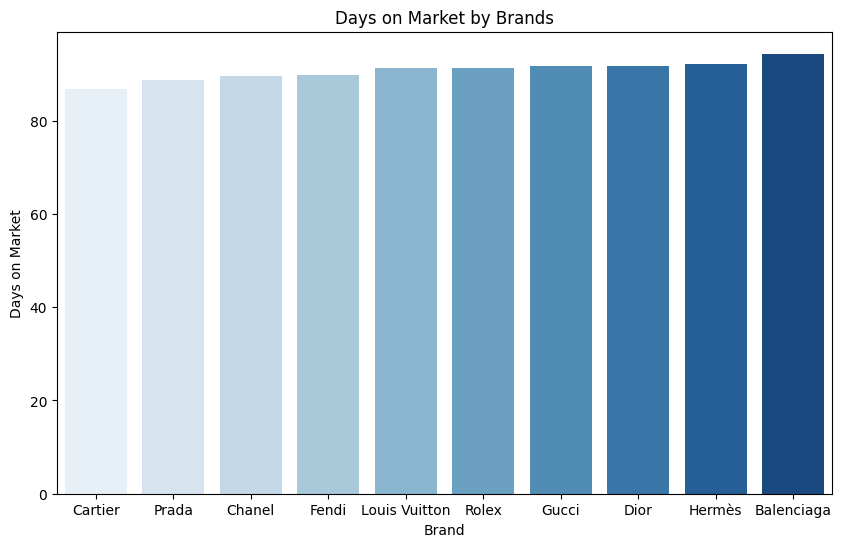

In [ ]:
#Average Days on Market by Brand
brand_days = round(dataset.groupby("Brand")["Days on Market"].mean(),2)
brand_days = brand_days.sort_values().reset_index()
#Visualisation
plt.figure(figsize = (10,6))
sns.barplot(data = brand_days, x = "Brand", y = "Days on Market", palette = "Blues")
plt.title("Days on Market by Brands")

- Cartier and Prada have the shortest days on market
    - These brands sell faster than others, meaning their resale demand is higher or they are priced competitively.
    - Possible Reasons:
        - Cartier jewelry (Love Bracelets, Panthère watches) is highly sought after due to timeless appeal.
        - Prada’s popular handbags (Re-Edition, Cleo) have strong seasonal demand, leading to quicker resale.
    - **Implication for TFG:**
        - Since these brands sell fast, TFG should frequently restock them to maintain a steady cash flow.
        - Consider premium pricing for fast-selling Cartier jewelry (bracelets, rings, watches).

- Balenciaga and Hermès take the longest to sell (~95+ Days)
    - Items from these brands sit on the market longer, indicating lower resale demand or pricing issues.
    - Possible Reasons:
        - Balenciaga’s recent brand controversies & trend-driven nature might have impacted its demand.
        - Hermès is highly exclusive, but expensive pricing might slow resale turnover—buyers may prefer direct retail purchases for new items.
    - **Implication for TFG:**
        - If resale demand is low, TFG may need to adjust prices or offer discounts to move these items faster.
        - For Hermès, consider marketing strategies like “collector’s investments” to justify higher prices and longer market times.

In [ ]:
#Import the clean dataset to Power BI for visualisation
dataset.to_csv("clean_resale_TFG.csv", index = False)